In [85]:
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt


from model import *

## Create a directed graph
- networkx
- graphviz

In [126]:


    
def test_networkx():
    """
    """
    # create graph #
    G = nx.DiGraph()
    
    # Add nodes
    nodes = [1, 2, 3, 4]
    
    # Add edges
    edges = [(1, 2), (2, 3), (3, 4), (1, 4)]
    
    fig =  view_networkx( nodes, edges)
    fig.show()

# test_networkx()


### graphviz ###

In [49]:

import graphviz  # doctest: +NO_EXE



// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}



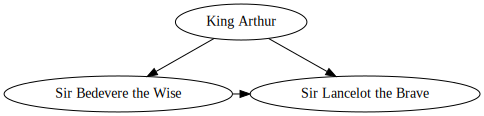

In [57]:
def test_dot():
    dot = graphviz.Digraph(comment='The Round Table')
    dot.node('A', 'King Arthur')  # doctest: +NO_EXE
    dot.node('B', 'Sir Bedevere the Wise')
    dot.node('L', 'Sir Lancelot the Brave')
    
    dot.edges(['AB', 'AL'])
    dot.edge('B', 'L', constraint='false')
    
    print( dot.source)
    return dot
test_dot()

In [63]:
dfg

{('check ticket', 'decide'): 6,
 ('check ticket', 'examine casually'): 2,
 ('check ticket', 'examine thoroughly'): 1,
 ('decide', 'pay compensation'): 3,
 ('decide', 'reinitiate request'): 3,
 ('decide', 'reject request'): 3,
 ('examine casually', 'check ticket'): 4,
 ('examine casually', 'decide'): 2,
 ('examine thoroughly', 'check ticket'): 2,
 ('examine thoroughly', 'decide'): 1,
 ('register request', 'check ticket'): 2,
 ('register request', 'examine casually'): 3,
 ('register request', 'examine thoroughly'): 1,
 ('reinitiate request', 'check ticket'): 1,
 ('reinitiate request', 'examine casually'): 1,
 ('reinitiate request', 'examine thoroughly'): 1}

## pm4py

In [178]:
import pandas as pd
import pm4py
import datetime

data = pd.read_csv("data/running-example.csv", sep=';', dtype={'case_id': str}, parse_dates = ['timestamp'])
data.loc[ :, "timestamp"]  = pd.to_datetime(data["timestamp"])
data.describe()
data.columns


Index(['case_id', 'activity', 'timestamp', 'costs', 'resource'], dtype='object')

In [36]:
event_log = pm4py.format_dataframe( data, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))


Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}


In [37]:
start_activities

{'register request': 6}

### filter ###

In [27]:
filtered = pm4py.filter_start_activities( event_log, {'register request'}, activity_key='activity',)

In [152]:
# {'register request'}

# filtered_relations = [('decide', 'reinitiate request')]
filtered_relations = [('check ticket', 'decide')]
filtered_reinit_event_log = pm4py.filter_directly_follows_relation( event_log, relations = filtered_relations )
top_variant_event_log = pm4py.filter_variants_top_k( event_log, k = 1)

### process discovery ###

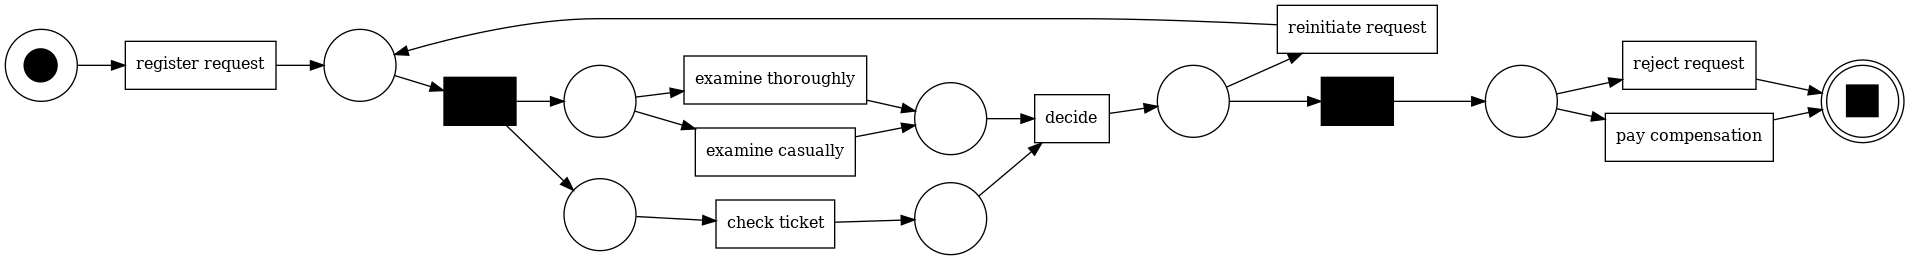

''

In [235]:
### --- dfg --- ###
# dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
# chart = pm4py.view_dfg(dfg, start_activities=start_activities, end_activities=end_activities)
# chart 

### --- heuristic map --- ###
# petrinet, initial_marking, final_marking = pm4py.discover_petri_net_alpha(event_log)
# pm4py.view_petri_net( petri_net=petrinet, initial_marking=initial_marking, final_marking=final_marking)

### --- heuristic map --- ###
# map = pm4py.discover_heuristics_net(event_log)
# pm4py.view_heuristics_net(map)

### --- BPMN --- ###
# bpmn = pm4py.discover_bpmn_inductive(event_log)
# pm4py.view_bpmn( bpmn, format='png')
# pm4py.save_vis_bpmn( bpmn, "output/bpmn.png")
    
### --- Process tree --- ###
# map = pm4py.discover_process_tree_inductive(event_log)
# pm4py.view_process_tree(map)

### --- inductive --- ###
petrinet, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net( petri_net=petrinet, initial_marking=initial_marking, final_marking=final_marking)
pm4py.save_vis_petri_net( petrinet, initial_marking, final_marking, 'output/petri_net.png')

# petrinet, initial_marking, final_marking = pm4py.discover_petri_net_inductive(filtered_reinit_event_log)
# pm4py.view_petri_net( petri_net=petrinet, initial_marking=initial_marking, final_marking=final_marking)

# petrinet, initial_marking, final_marking = pm4py.discover_petri_net_inductive(top_variant_event_log)
# pm4py.view_petri_net( petri_net=petrinet, initial_marking=initial_marking, final_marking=final_marking)

### --- ILP miner --- ###
# petrinet, initial_marking, final_marking = pm4py.discover_petri_net_ilp(event_log)
# pm4py.view_petri_net( petri_net=petrinet, initial_marking=initial_marking, final_marking=final_marking)

### --- dotted chart --- ###
# pm4py.view_dotted_chart( event_log, format='png')

nodes->{'#Start#': 0, '#End#': 1, 'register request': 2, 'reject request': 3, 'pay compensation': 4, 'check ticket': 5, 'decide': 6, 'examine casually': 7, 'examine thoroughly': 8, 'reinitiate request': 9}
edges->[('#Start#', 'register request'), ('reject request', '#End#'), ('pay compensation', '#End#'), ('check ticket', 'decide'), ('check ticket', 'examine casually'), ('check ticket', 'examine thoroughly'), ('decide', 'pay compensation'), ('decide', 'reinitiate request'), ('decide', 'reject request'), ('examine casually', 'check ticket'), ('examine casually', 'decide'), ('examine thoroughly', 'check ticket'), ('examine thoroughly', 'decide'), ('register request', 'check ticket'), ('register request', 'examine casually'), ('register request', 'examine thoroughly'), ('reinitiate request', 'check ticket'), ('reinitiate request', 'examine casually'), ('reinitiate request', 'examine thoroughly')]
// sample
digraph {
	0 [label="#Start#"]
	1 [label="#End#"]
	2 [label="register request"]
	3 

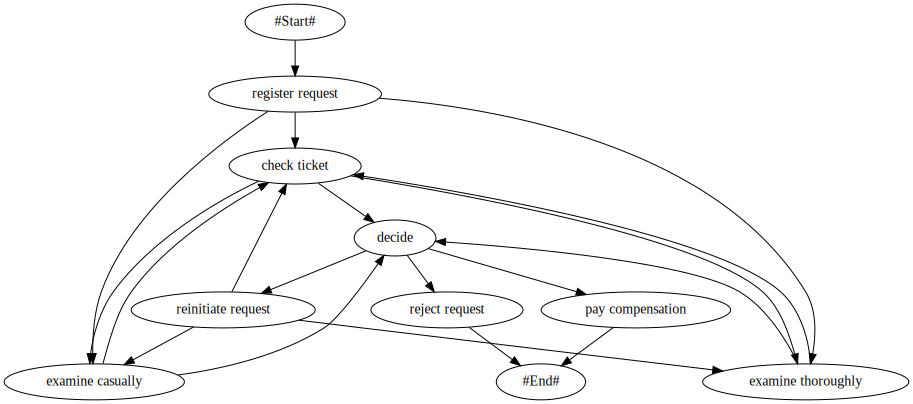

In [69]:
def dfg2dot( dfg, start, end, dot_name: str):
    """
    Argument
        dfg: a list of dict of edges from directly-follow-graph
        start: a dict of start activities
        end: a dict of end activities
    Return
        dot: dot-formatted digraph
    """
    PROCESS_START = '#Start#'
    PROCESS_END = '#End#'
    nodes = { PROCESS_START: 0, PROCESS_END: 1}
    node_idx = 2
    for activity in start:
        assert activity not in nodes, f"#ERROR: {activity} exists"
        nodes[activity] = node_idx
        node_idx += 1
    for activity in end:
        assert activity not in nodes, f"#ERROR: {activity} exists"
        nodes[activity] = node_idx
        node_idx += 1
    for node in dfg:
        left_activity = node[0]
        if left_activity not in nodes:
            nodes[left_activity] = node_idx
            node_idx +=1 
        right_activity = node[1]
        if right_activity not in nodes:
            nodes[right_activity] = node_idx
            node_idx +=1 

    edges = []
    for activity in start:
        from_id = str(nodes.get(PROCESS_START))
        to_id = str(nodes.get(activity))
        edges.append( ( PROCESS_START, activity) ) 
    for activity in end:
        from_id = sfigtr(nodes.get(activity))
        to_id = str(nodes.get(PROCESS_END))
        edges.append( ( activity, PROCESS_END) ) 
    for transition in dfg:
        edges.append( ( transition[0], transition[1]) ) 
    print(f"nodes->{nodes}")
    print(f"edges->{edges}")
    
    dot = graphviz.Digraph(comment=dot_name)
    for node_name, node_id in nodes.items():
        dot.node( str(node_id), str(node_name))  # doctest: +NO_EXE
    for edge in edges:
        dot.edge( str(nodes.get(edge[0])), str(nodes.get(edge[1])) )
    
    print( dot.source)
    return dot

dot = dfg2dot( dfg, start_activities, end_activities, 'sample')
dot

nodes->['#Start#', '#End#', 'register request', 'reject request', 'pay compensation', 'check ticket', 'decide', 'examine casually', 'examine thoroughly', 'reinitiate request']
edges->[('#Start#', 'register request'), ('reject request', '#End#'), ('pay compensation', '#End#'), ('check ticket', 'decide'), ('check ticket', 'examine casually'), ('check ticket', 'examine thoroughly'), ('decide', 'pay compensation'), ('decide', 'reinitiate request'), ('decide', 'reject request'), ('examine casually', 'check ticket'), ('examine casually', 'decide'), ('examine thoroughly', 'check ticket'), ('examine thoroughly', 'decide'), ('register request', 'check ticket'), ('register request', 'examine casually'), ('register request', 'examine thoroughly'), ('reinitiate request', 'check ticket'), ('reinitiate request', 'examine casually'), ('reinitiate request', 'examine thoroughly')]


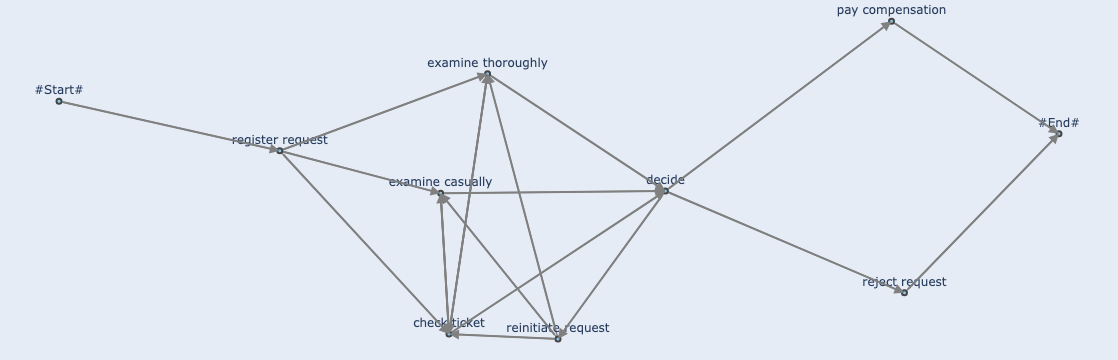

In [128]:
dot_layout = nx.nx_agraph.graphviz_layout( nx_graph, prog="sfdp")
fig = view_networkx(nx_graph, dot_layout)
fig

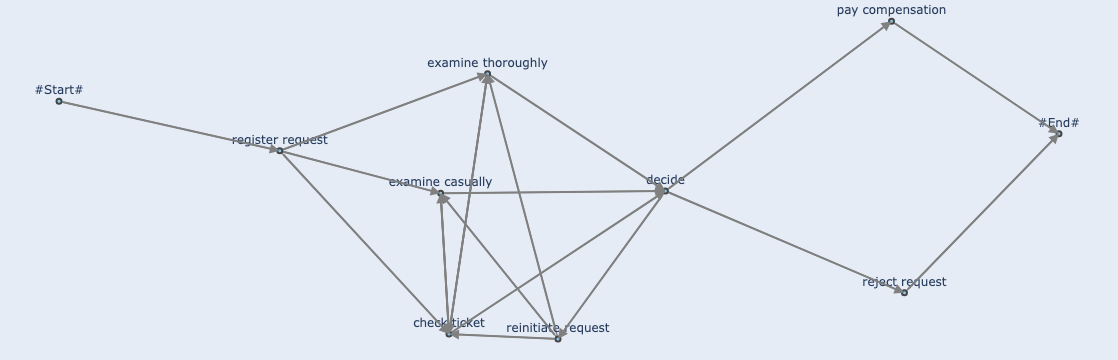

In [222]:
fig